In [1]:
conda activate tilepyenv

usage: conda [-h] [--no-plugins] [-V] COMMAND ...
conda: error: argument COMMAND: invalid choice: 'activate' (choose from 'clean', 'compare', 'config', 'create', 'info', 'init', 'install', 'list', 'notices', 'package', 'remove', 'uninstall', 'rename', 'run', 'search', 'update', 'upgrade', 'build', 'content-trust', 'convert', 'debug', 'develop', 'doctor', 'index', 'inspect', 'metapackage', 'render', 'skeleton', 'env', 'server', 'verify', 'repo', 'token', 'pack')

Note: you may need to restart the kernel to use updated packages.


In [2]:
from tilepy.include.UniversalScheduleLauncher import getdate, GetUniversalSchedule
from tilepy.include.PointingTools import ObservationParameters, NextWindowTools
import time
import argparse
import os


In [3]:
# Type of followup, options: gbm, gbmpng or gw
alertType = 'gw'

# The url to the FITS file with the sky localization, e.g.for GW https://urlpath/Bayestar.fits.gz'
# You can use https://gracedb.ligo.org/api/superevents/MS230802n/files/bayestar.multiorder.fits,0

url = 'https://gracedb.ligo.org/api/superevents/S190814bv/files/LALInference.v1.fits.gz'

# Date and time of the event in format YYYY-MM-DD HH:MM:SS. You can use 2023-07-15 14:30:10 for the example .fits file
obsTime = getdate("2023-10-12 00:30:10")

# Path to the input datasets (where galaxy cat should be for GW case)
datasetDir = './dataset/'

# Path to the output folder
outDir = './output'

# Config file for the tiling scheduling
cfgFile = './config/FollowupParameters.ini'

# Galaxy catalog name (if no catalog is given, the approach will be 2D)
galcatName = "converted_GLADE.h5"

# Tiles already observed
pointingsFile = None

# Limit on skyloc to perform a followup
locCut = None

In [4]:
ObsArray = ['HESS', 'LST']
parameters = []

In [5]:
for i in ObsArray:
    parameters.append("./config/FollowupParameters_%s.ini" % i)
print("===========================================================================================")
print('parameters', parameters)
obsparameters = []

parameters ['./configs/FollowupParameters_HESS.ini', './configs/FollowupParameters_LST.ini']


In [6]:
for j in range(len(parameters)):
    obspar = ObservationParameters()
    obspar.add_parsed_args(url, obsTime, datasetDir, galcatName, outDir, pointingsFile, alertType, locCut)
    obspar.from_configfile(parameters[j])
    obsparameters.append(obspar)

https://gracedb.ligo.org/api/superevents/S190814bv/files/LALInference.v1.fits.gz
The filename is  LALInference.v1.fits.gz
curl https://gracedb.ligo.org/api/superevents/S190814bv/files/LALInference.v1.fits.gz -o LALInference.v1.fits.gz


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1498k  100 1498k    0     0   828k      0  0:00:01  0:00:01 --:--:--  830k


./dataset/
converted_GLADE.h5
obsparameters 2
Loading map from  LALInference.v1.fits.gz
Loading LVC HEALPix map from file: LALInference.v1.fits.gz
Event has triggered  Non specified  => distance = 267.40  +- 51.59  Mpc
Loading galaxy catalogue from ./dataset/converted_GLADE.h5
done loading galaxies
No pointings were given to be substracted


INFO:healpy:62.83337217325612 117.16662782674388 -27.166627826743873 27.166627826743873
INFO:healpy:The interval between parallels is 5 deg 0.00'.
INFO:healpy:The interval between meridians is 3 deg 0.00'.


Min Zenith=  30


INFO:healpy:62.83337217325612 117.16662782674388 -27.166627826743873 27.166627826743873
INFO:healpy:The interval between parallels is 5 deg 0.00'.
INFO:healpy:The interval between meridians is 3 deg 0.00'.


Min Zenith=  65


INFO:healpy:62.83337217325612 117.16662782674388 -27.166627826743873 27.166627826743873
INFO:healpy:The interval between parallels is 5 deg 0.00'.
INFO:healpy:The interval between meridians is 3 deg 0.00'.


Min Zenith=  40


INFO:healpy:62.83337217325612 117.16662782674388 -27.166627826743873 27.166627826743873
INFO:healpy:The interval between parallels is 5 deg 0.00'.
INFO:healpy:The interval between meridians is 3 deg 0.00'.


Min Zenith=  70
     dp_dV_FOV      
--------------------
0.019446113851503355
NOT passing the cut on dp_dV_FOV >  0.02
     dp_dV_FOV      
--------------------
0.002199121193910203
NOT passing the cut on dp_dV_FOV >  0.02
     dp_dV_FOV      
--------------------
0.019446113851503355
NOT passing the cut on dp_dV_FOV >  0.02
     dp_dV_FOV      
--------------------
0.002199121193910203
NOT passing the cut on dp_dV_FOV >  0.02
No window found
     dp_dV_FOV      
--------------------
0.019446113851503355
NOT passing the cut on dp_dV_FOV >  0.02
No window found
Observation Time UTC RA(deg) DEC(deg)  PGW    Pgal  Round ObsName
-------------------- ------- -------- ------ ------ ----- -------
 2023-10-12 00:30:10 12.8799 -24.9664 0.7587 0.6748     1    HESS
 2023-10-12 00:30:10  23.459 -32.7442 0.0736  0.111     1     LST
 2023-10-12 01:00:10 11.7751 -23.1807 0.0669 0.0561     1    HESS
 2023-10-12 01:00:10 13.8188 -26.9431 0.0562 0.0507     1     LST

Observation Time UTC RA(deg) DEC(de

INFO:healpy:0.0 180.0 -180.0 180.0
INFO:healpy:The interval between parallels is 30 deg -0.00'.
INFO:healpy:The interval between meridians is 30 deg -0.00'.


./output/S190814bv/PGalinFoV_NObs
Loading pointings from ./output/S190814bv/PGalinFoV_NObs/SuggestedPointings_GWOptimisation_HESS.txt
----------   PLOTTING THE SCHEDULING   ----------
Total covered probability with the scheduled tiles is PGW= 0.82560
[datetime.datetime(2023, 10, 12, 0, 30, 10), datetime.datetime(2023, 10, 12, 1, 0, 10)]
Observation Time UTC RA(deg) DEC(deg)  PGW    Pgal  Round ObsName
-------------------- ------- -------- ------ ------ ----- -------
 2023-10-12 00:30:10  23.459 -32.7442 0.0736  0.111     1     LST
 2023-10-12 01:00:10 13.8188 -26.9431 0.0562 0.0507     1     LST
Loading pointings from ./output/S190814bv/PGalinFoV_NObs/SuggestedPointings_GWOptimisation_LST.txt

---------  RANKING THE OBSERVATIONS AND PRODUCING THE OUTPUT FILES   ----------



INFO:healpy:0.0 180.0 -180.0 180.0
INFO:healpy:The interval between parallels is 30 deg -0.00'.
INFO:healpy:The interval between meridians is 30 deg -0.00'.


./output/S190814bv/PGalinFoV_NObs
Loading pointings from ./output/S190814bv/PGalinFoV_NObs/SuggestedPointings_GWOptimisation_LST.txt
----------   PLOTTING THE SCHEDULING   ----------
Total covered probability with the scheduled tiles is PGW= 0.12980
[datetime.datetime(2023, 10, 12, 0, 30, 10), datetime.datetime(2023, 10, 12, 1, 0, 10)]


INFO:healpy:0.0 180.0 -180.0 180.0
INFO:healpy:The interval between parallels is 30 deg -0.00'.
INFO:healpy:The interval between meridians is 30 deg -0.00'.


Loading pointings from ./output/S190814bv/PGalinFoV_NObs/SuggestedPointings_GWOptimisation.txt
----------   PLOTTING THE SCHEDULING   ----------
Total covered probability with the scheduled tiles is PGW= 0.95540
[datetime.datetime(2023, 10, 12, 0, 30, 10), datetime.datetime(2023, 10, 12, 0, 30, 10), datetime.datetime(2023, 10, 12, 1, 0, 10), datetime.datetime(2023, 10, 12, 1, 0, 10)]


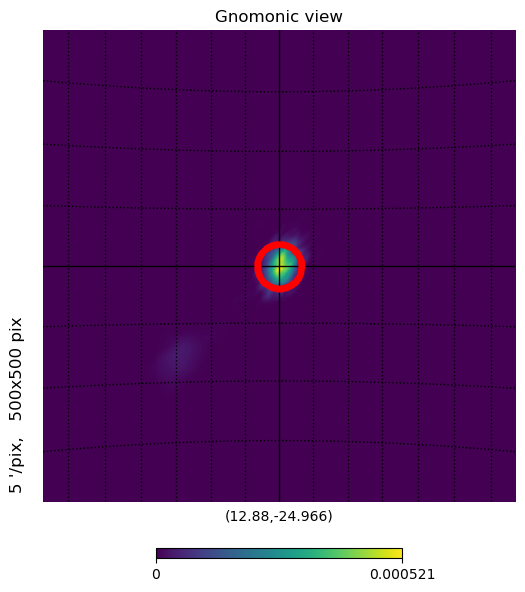

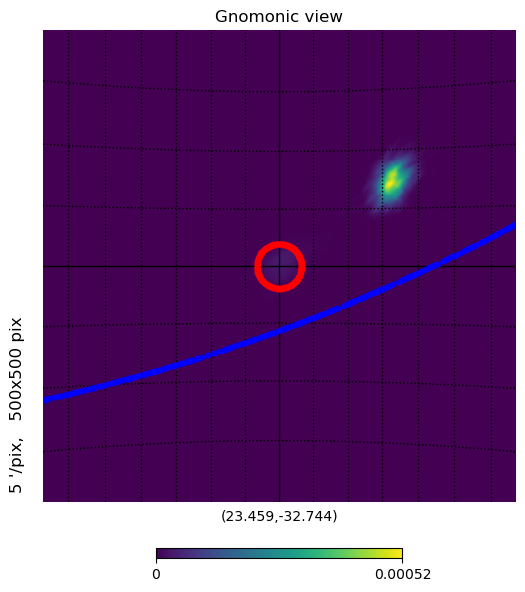

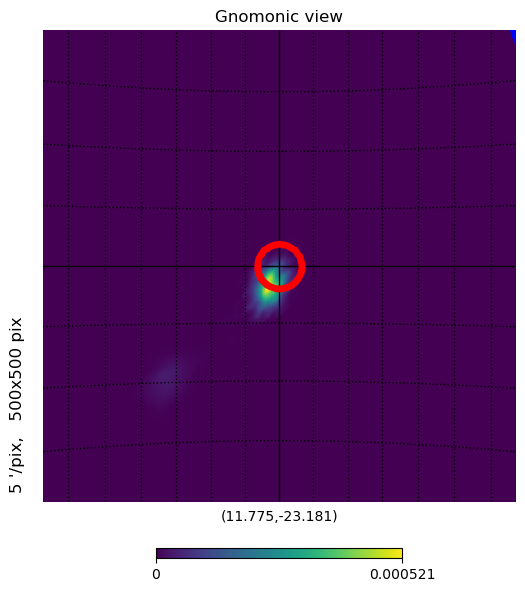

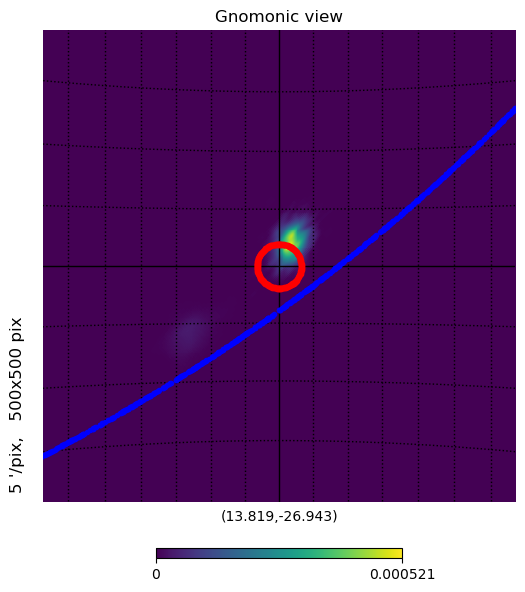

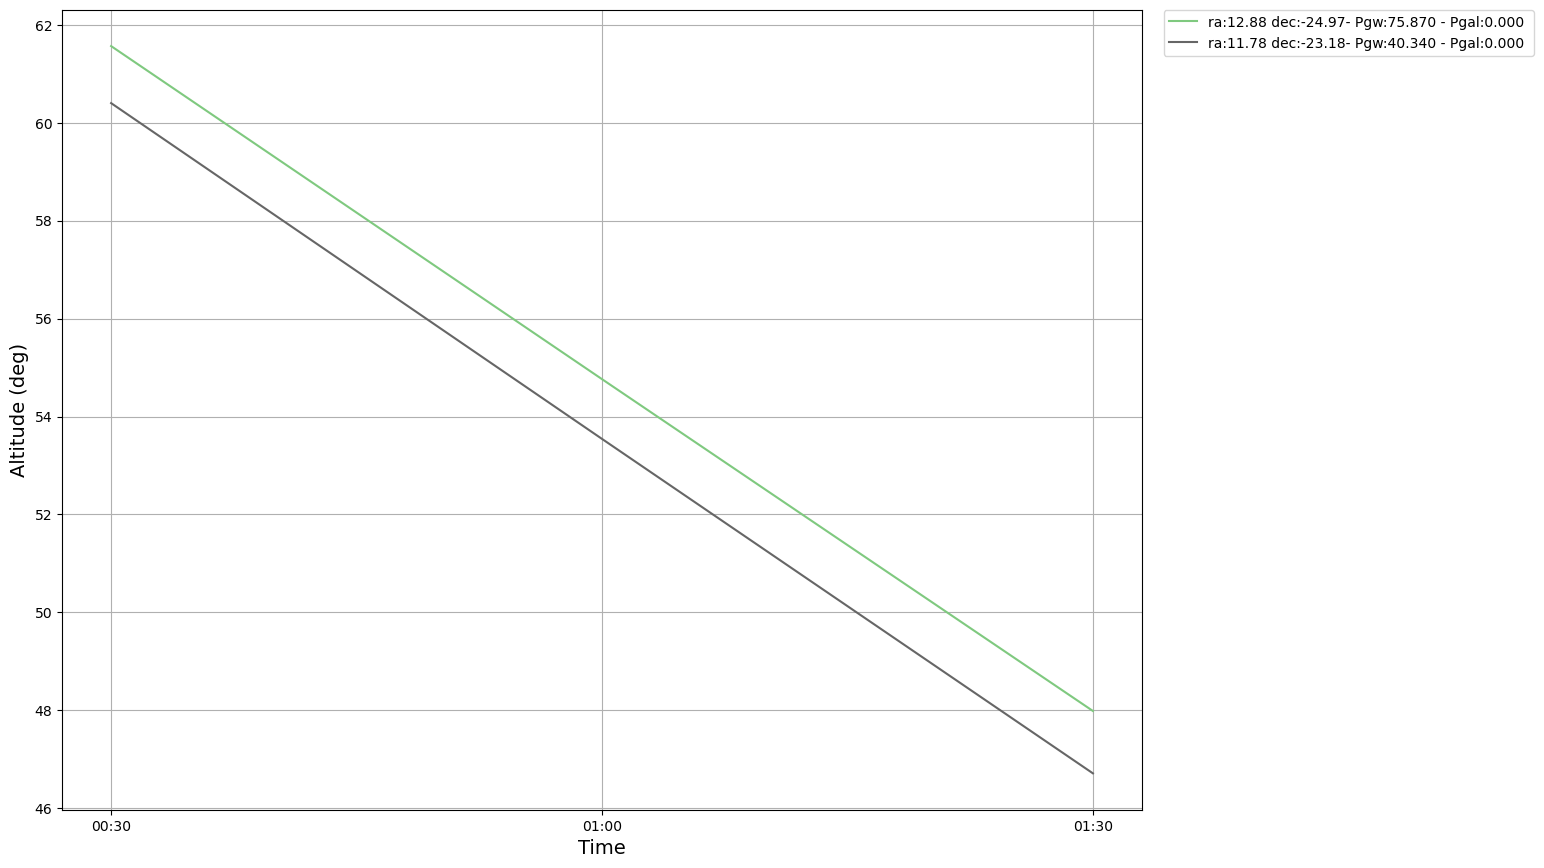

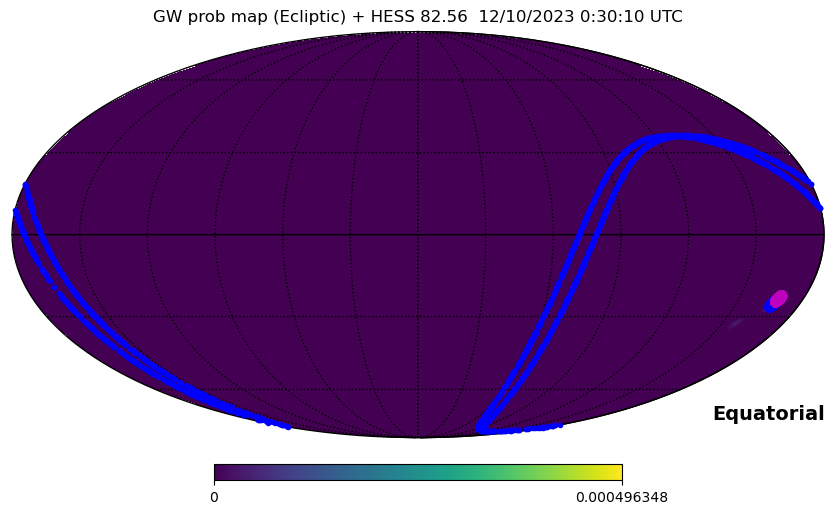

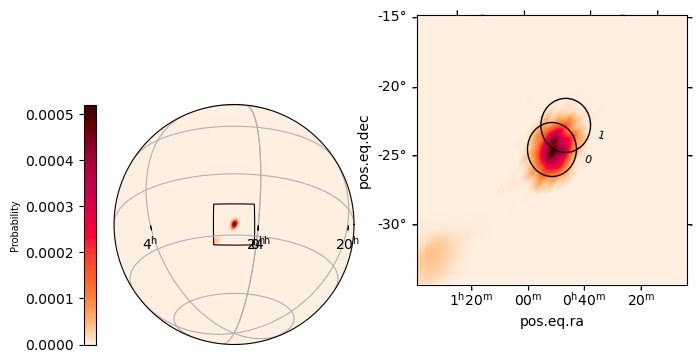

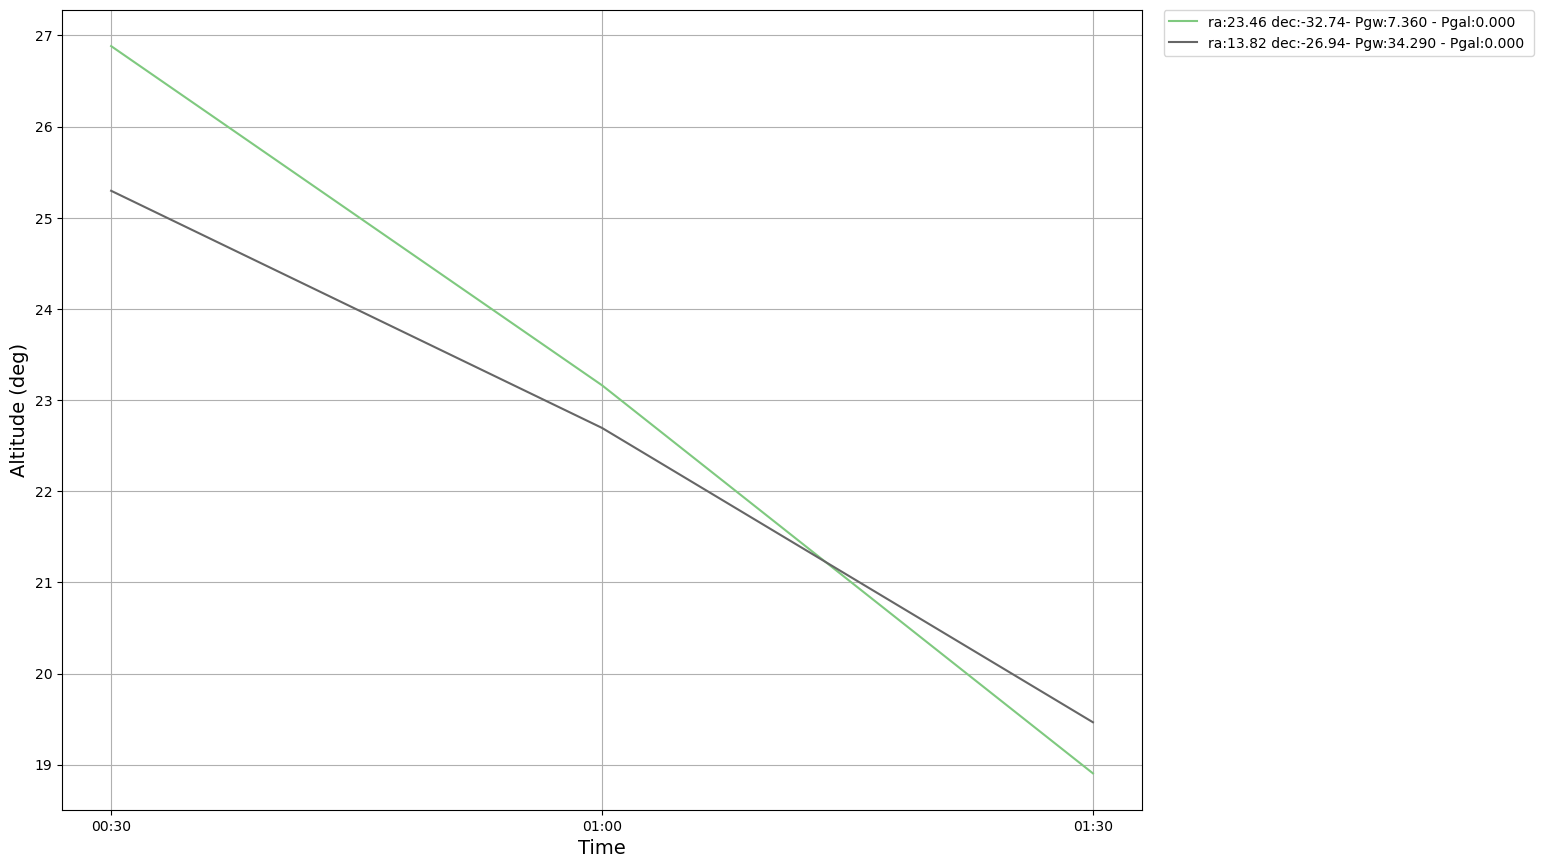

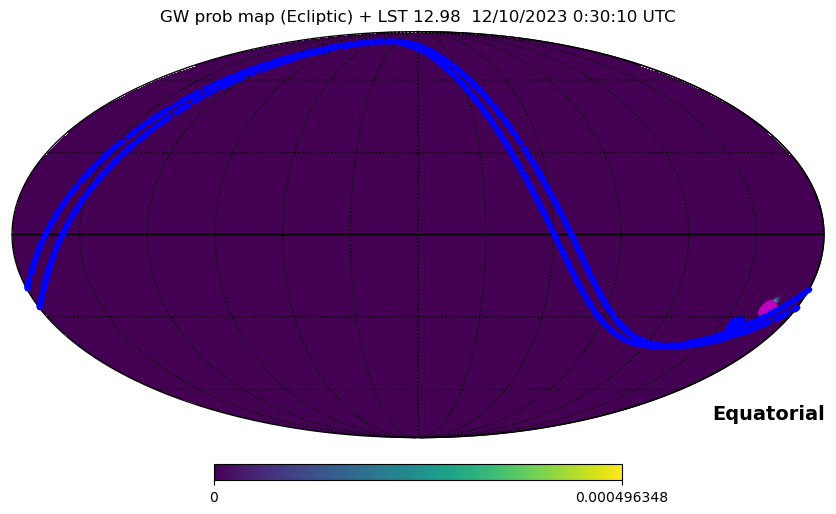

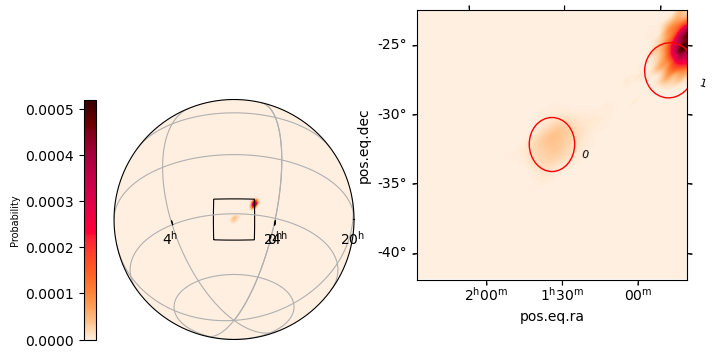

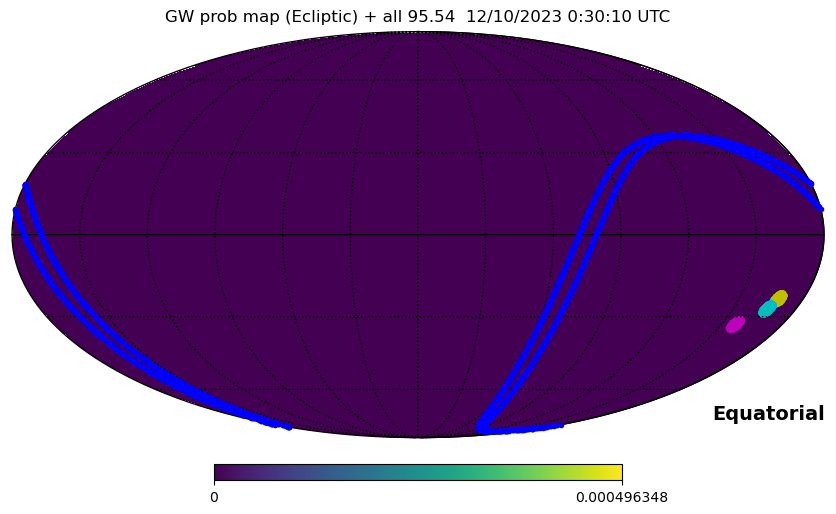

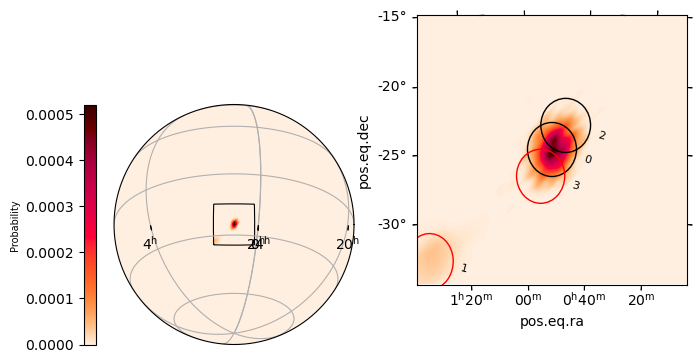

In [7]:
GetUniversalSchedule(obsparameters)